<a href="https://colab.research.google.com/github/Ashwin-ap/API/blob/master/Pandas_EDA_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = {'A' : [1,2,2,3,5,9],
        'B' : [4,5,5,7,18,0]}
df = pd.DataFrame(data)
print(df)

   A   B
0  1   4
1  2   5
2  2   5
3  3   7
4  5  18
5  9   0


In [4]:
print(df.duplicated())

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool


In [6]:
df1 = df.drop_duplicates()
print(df1)

   A   B
0  1   4
1  2   5
3  3   7
4  5  18
5  9   0


In [7]:
q = df['A'].quantile(0.99)
print(q)

8.8


In [8]:
df['A'] = df['A'].clip(upper=q, lower=None)
print(df)

     A   B
0  1.0   4
1  2.0   5
2  2.0   5
3  3.0   7
4  5.0  18
5  8.8   0


In [9]:
data = {'A' : [1,2,3,np.nan, np.nan],
        'B' : [5,np.nan, 6,7, np.nan]}
df = pd.DataFrame(data)
print(df)

     A    B
0  1.0  5.0
1  2.0  NaN
2  3.0  6.0
3  NaN  7.0
4  NaN  NaN


In [10]:
print(df.isna())

       A      B
0  False  False
1  False   True
2  False  False
3   True  False
4   True   True


In [11]:
print(df.fillna(value=0))

     A    B
0  1.0  5.0
1  2.0  0.0
2  3.0  6.0
3  0.0  7.0
4  0.0  0.0


In [12]:
print(df.fillna(df.mean()))

     A    B
0  1.0  5.0
1  2.0  6.0
2  3.0  6.0
3  2.0  7.0
4  2.0  6.0


In [15]:
df['A'] = df['A'].fillna(df['A'].mean())
df['B'] = df['B'].fillna(df['B'].mean())
print(df)

     A    B
0  1.0  5.0
1  2.0  6.0
2  3.0  6.0
3  2.0  7.0
4  2.0  6.0


In [18]:
print(df)
m = df.min()
n = df.max()
print(m,n)

     A    B
0  1.0  5.0
1  2.0  6.0
2  3.0  6.0
3  2.0  7.0
4  2.0  6.0
A    1.0
B    5.0
dtype: float64 A    3.0
B    7.0
dtype: float64


In [23]:
data = {'A' : ['Green', 'Blue', 'Brown', 'Pink'],
        'B' : [5,8,10,23]}
df = pd.DataFrame(data)
print(df)

       A   B
0  Green   5
1   Blue   8
2  Brown  10
3   Pink  23


In [21]:
df = pd.get_dummies(df, columns=['A'])
print(df)

    B  A_Blue  A_Brown  A_Green  A_Pink
0   5       0        0        1       0
1   8       1        0        0       0
2  10       0        1        0       0
3  23       0        0        0       1


In [24]:
df['A'] = df['A'].replace({'Green': 10, 'Blue': 21, 'Brown': 31, 'Pink': 9})
print(df)

    A   B
0  10   5
1  21   8
2  31  10
3   9  23


In [30]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [31]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
import numpy as np

In [36]:
np_array = df.values
np.array

<function numpy.array>

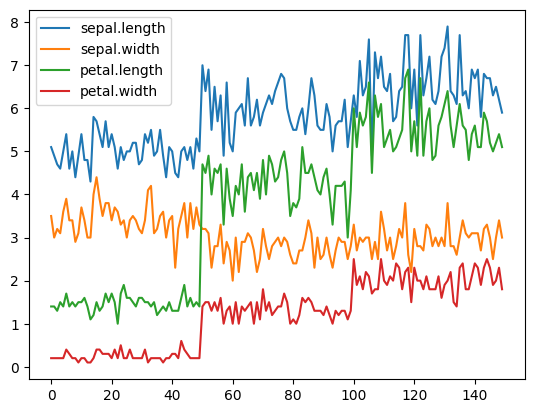

In [37]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [38]:
import seaborn as sb


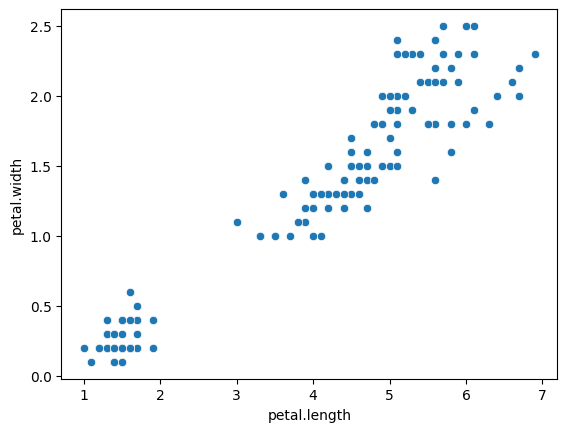

In [40]:
sb.scatterplot(data=df, x = 'petal.length', y='petal.width')
plt.show()

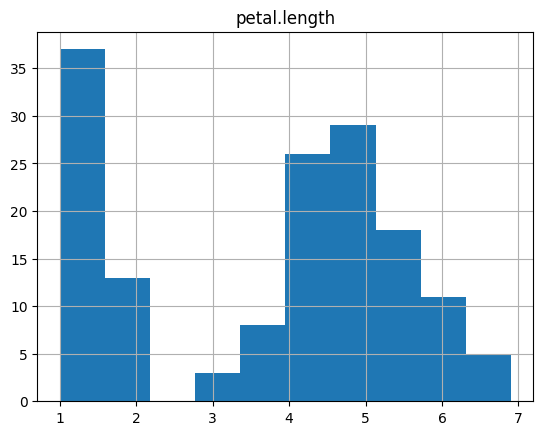

In [42]:
df.hist(column='petal.length')
plt.show()

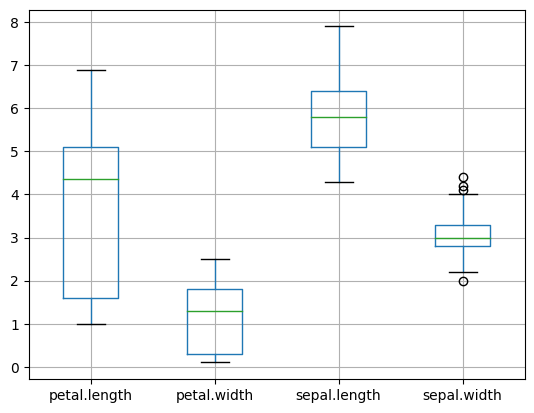

In [43]:
df.boxplot(column=['petal.length', 'petal.width', 'sepal.length', 'sepal.width'])
plt.show()

In [44]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [45]:
df.cov()


<ipython-input-45-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.685694,-0.042434,1.274315,0.516271
sepal.width,-0.042434,0.189979,-0.329656,-0.121639
petal.length,1.274315,-0.329656,3.116278,1.295609
petal.width,0.516271,-0.121639,1.295609,0.581006


In [46]:
!pip install plotly

In [47]:
import plotly.express as px

In [49]:
figscatter = px.scatter(df, x='sepal.width', y='sepal.length')
figscatter.show()